# 1 BUSINESS UNDERSTANDING

## 1.1 Overview
Consumers will give their business to brands they trust, and emotions are at the heart of this trust. When people identify with a brand, it’s easy for them to support the company. Marketers work hard to build and strengthen emotional ties to help consumers feel they have a vested interest in the brand’s success.

There are 486 million users on twitter and a lot of brands have hopped onto the platform to reach these potential customers. With the ever increasing portfolio of products, there is also an increase in the sentiments held by people who have interacted with them. Sentiment analysis refers to identifying and classifying the opinions expressed in the text source. The results of the analysis will assist businesses in determining how consumers feel about their goods and services, providing information on where changes can be made and what can be promoted.


## 1.2 Problem Statement
Twitter has become a major platform for many organisations worldwide to interact with their clients and other businesses. Major brands such as Google and Apple have a large following on twitter hence this platform offers a direct point of contact to their large pool of users. The composition users range from those who like, hate or are neutral towards a particular product, marketing strategy or proposed changes.

This pool of diverse users helps a brand, such as Google and Apple, identify a consumer’s sentiment towards its products and services thus leading to insights on where to bring improvements and what to promote.

These major brands would like to get the attitudes of their customers to their products which are available in the market.


## 1.3 Business Objective
To accurately classify the polarity of tweets to predict customers’ satisfaction when using either Apple or Google products.

## 1.4 Specific Objectives
- To identify the relationship between tweet sentiment and brands.
- To identify how brands are associated with emotions.


## 1.5 Business Success Criteria
The project will be deemed successful if:
- the brand is matched to its tweet sentiments
- the consumer can identify which brand they should adopt depending on its sentiments


## 1.6 Assessing the Situation
The dataset for this project contains tweets expressing sentiments on two main brands: Apple and Google. The two brands offer various devices and services. For instance ipads, iphones and various applications from either brand. The data contains numerous missing values hence the approach of handling them will greatly influence the success of the model. To begin with, we shall use local jupyter notebooks and sync on a git repository.

## 1.7 Determining Project Goals
The goals of the project are to determine:
- Which features in each brand provide customer satisfaction
- Which brand has the highest positive review



## 1.8 Determining Project Success Criteria
Tentatively, the study will be judged a success if:
- The final model achieves an accuracy, precision and recall of 80% or more in classifying  tweets as either positive, neutral or negative. How much confidence?
- The project can be finished within less than a week  time for deployment so as to enable clients access to the online system.
- The final deployed model is able to guide the marketing team on how to improve their products and marketing strategy.
- The final model is able to guide the clients on which products to choose from.


## 1.9 Project Plan
Duration: The project has a duration of 2 days:

Day 1:  Business Understanding, Data Understanding and Data Preparation

Day 2: Modeling, Evaluation and Deployment

Resources: There is enough available data for our analysis.

Personnels: The project has 6 young energetic dedicated personnel ready for the task.

# 2 DATA UNDERSTANDING


## 2.1 Importing libraries and loading data

In [90]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import string

# Libraries used in visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for nlp
import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt',quiet=True)
nltk.download('wordnet',quiet=True)
nltk.download('stopwords',quiet=True)
nltk.download('omw-1.4',quiet=True)

# Libraries used in modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [44]:
# Loading the dataset
data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding = 'latin1')
data

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [45]:
# Checking the dataset's head
data.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [46]:
# Checking the dataset's tail
data.tail(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9083,"Google says the future is all around you! (ie,...",NaN,No emotion toward brand or product
9084,"Google says the future is location, location, ...",NaN,No emotion toward brand or product
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion
9086,Google says: want to give a lightning talk to ...,NaN,No emotion toward brand or product
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [47]:
# Checking the shape
data.shape

(9093, 3)

In [48]:
# Description
data.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [49]:
# Checking for duplicates
data.duplicated().sum()

22

In [50]:
# Checking for missing values
data.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [51]:
# Value_counts for the data
print(f"""
{data.emotion_in_tweet_is_directed_at.value_counts()}
-----------------------------------------------------------------------
{data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()}
""")


iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64
-----------------------------------------------------------------------
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64



In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


The following observations were made on the data:
- The data had 3 columns and 9093 rows
- There data contained 22 dupliates
- There were some missing values in the rows
- The target column is is_there_an_emotion_directed_at_a_brand_or_product and has 3 groups
- Both columns were of object type

# 3. DATA PREPARATION

General steps:
- Rename columns
- Remove missing value from tweet_text
- Handle the duplicated data
- Remove Capitalization
- Remove Punctuation
- Remove stop words
- Fill emotion_in_tweet_is_directed_at with their appropriate values

## 2.1 Uniformity, Completeness and consistency checks
- The columns are renamed
- Duplicated data is dropped
- Missing values are handled

In [53]:
# Rename the columns
data.rename(columns={"tweet_text":"tweet","emotion_in_tweet_is_directed_at":"brand",
                    "is_there_an_emotion_directed_at_a_brand_or_product":"sentiment"},inplace=True)
data.head()

,tweet,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [54]:
# Drop missing row in tweet column 
data.dropna(subset=["tweet"],inplace=True)
data.isna().sum()

tweet           0
brand        5801
sentiment       0
dtype: int64

In [55]:
# Drop the duplicated data
data.drop_duplicates(inplace=True)
# Check if the duplicates have been dropped
data.duplicated().sum()

0

In [56]:
# Remove Capitalization in tweets
data["tweet"] = data["tweet"].str.lower()
# Preview data
data.head()

,tweet,brand,sentiment
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion


## 2.2 Basic cleaning of the data
In this section, the following is removed:
- The usernames from the tweet
- The hyperlinks in the tweet
- Hashtags in the tweet
- Punctuation and numbers are removed from the tweet
- Stopwords are removed from the texts

In [57]:
# Defining functions to clean data
def remove_links(tweet):
    """Takes in a string and removes weblinks from it"""

    tweet = re.sub(r"https\S+"," ",tweet) 
    tweet = re.sub(r"bit.ly/\S+", " ",tweet)
    return tweet

def remove_user(tweet):
    """Takes in a string and removes @user information from it"""
    tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',tweet)
    tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',tweet)
    return tweet

def remove_hasgtags(tweet):
    """Takes in a string and removes @user information from it"""
    tweeet = re.sub('(#[a-z]+[a-z0-9-_]+)', '',tweet)
    return tweet

def basic_clean(tweet):
    """Returns cleaned data, remove punctuation and numbers"""

    tweet = remove_user(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hasgtags(tweet)
    tweet = re.sub('['+ string.punctuation+ ']+', '',tweet) # Removes punctuation
    tweet = re.sub('([0-9]+)'," ",tweet) # Removes numbers
    return tweet
    

In [58]:
# Perform the basic clean on all the tweets in our dataframe
res = []
for tweets in data["tweet"]:
    res.append(basic_clean(tweets))
data["tweet"] = res
data.head()

,tweet,brand,sentiment
0,i have a g iphone after hrs tweeting at ri...,iPhone,Negative emotion
1,know about awesome ipadiphone app that youl...,iPad or iPhone App,Positive emotion
2,can not wait for ipad also they should sale...,iPad,Positive emotion
3,i hope this years festival isnt as crashy as ...,iPad or iPhone App,Negative emotion
4,great stuff on fri sxsw marissa mayer google ...,Google,Positive emotion


In [59]:
# Remove stop words 
stopwords = stopwords.words('english')
data['tweet'] = data.tweet.apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [60]:
# Preview the data
data.head()

,tweet,brand,sentiment
0,g iphone hrs tweeting riseaustin dead need upg...,iPhone,Negative emotion
1,know awesome ipadiphone app youll likely appre...,iPad or iPhone App,Positive emotion
2,wait ipad also sale sxsw,iPad,Positive emotion
3,hope years festival isnt crashy years iphone a...,iPad or iPhone App,Negative emotion
4,great stuff fri sxsw marissa mayer google tim ...,Google,Positive emotion


## 2.3 Rename contents of the dataframe

In [61]:
# Change the brand names to either Apple or Google
brands = {
    "iPhone":"Apple",
    "iPad": "Apple",
    "Android": "Google",
    "Android App": "Google",
    "iPad or iPhone App": "Apple",
    "Other Google product or service": "Google",
    "Other Apple product or service": "Apple"
}
data.replace({"brand":brands},inplace=True)

data.head()

,tweet,brand,sentiment
0,g iphone hrs tweeting riseaustin dead need upg...,Apple,Negative emotion
1,know awesome ipadiphone app youll likely appre...,Apple,Positive emotion
2,wait ipad also sale sxsw,Apple,Positive emotion
3,hope years festival isnt crashy years iphone a...,Apple,Negative emotion
4,great stuff fri sxsw marissa mayer google tim ...,Google,Positive emotion


In [62]:
# Fill the column in brand with their respective values
dict = {
    "iphone": "Apple",
    "android": "Google",
    "google": "Google",
    "ipad": "Apple",
    "ipad/iphone": "Apple",
    "apple": "Apple",
    "itunes": "Apple"
}

for key,value in dict.items():
    data["brand"][data.tweet.str.contains(key)] = value
data.brand.value_counts()

Apple     5436
Google    2927
Name: brand, dtype: int64

In [63]:
# Check null values
data.brand.isna().sum()

# Replace null values with Others
data.brand.fillna("Others",inplace=True)

In [64]:
# Check if the missing values have been handled
data.isna().sum()

tweet        0
brand        0
sentiment    0
dtype: int64

In [65]:
# Preview the data
data.head(10)

,tweet,brand,sentiment
0,g iphone hrs tweeting riseaustin dead need upg...,Apple,Negative emotion
1,know awesome ipadiphone app youll likely appre...,Apple,Positive emotion
2,wait ipad also sale sxsw,Apple,Positive emotion
3,hope years festival isnt crashy years iphone a...,Apple,Negative emotion
4,great stuff fri sxsw marissa mayer google tim ...,Google,Positive emotion
5,new ipad apps speechtherapy communication show...,Apple,No emotion toward brand or product
7,sxsw starting ctia around corner googleio hop ...,Google,Positive emotion
8,beautifully smart simple idea wrote hollergram...,Apple,Positive emotion
9,counting days sxsw plus strong canadian dollar...,Apple,Positive emotion
10,excited meet sxsw show sprint galaxy still run...,Google,Positive emotion


In [66]:
# Replace the No emotion toward brand or product with Neurtal emotion
data.replace({"No emotion toward brand or product":"Neutral emotion"},inplace=True)
data.sentiment.value_counts()

Neutral emotion     5375
Positive emotion    2970
Negative emotion     569
I can't tell         156
Name: sentiment, dtype: int64

Observations made:
- The 

# FEATURE ENGINEERING

- Tokenization
- lemmatization and Stemming
- Feature distribution
- Univariate and Bivariate analysis

In [67]:
# Tokenization
from nltk.tokenize import word_tokenize

word_tokens = []

for words in data["tweet"]:
    word_tokens.append(word_tokenize(words))

In [68]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
from textblob import Word

lemma = WordNetLemmatizer()

data['lemmatization'] = data.tweet.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 


In [69]:
# Perform polarity on the tweets 
pol = []
for text in data["lemmatization"]:
    pol.append(np.sum(TextBlob(text).polarity))

In [70]:
# Add the polarity to the dataframe
data['polarity'] = pol
data.head()

,tweet,brand,sentiment,lemmatization,polarity
0,g iphone hrs tweeting riseaustin dead need upg...,Apple,Negative emotion,g iphone hr tweeting riseaustin dead need upgr...,-0.200000
1,know awesome ipadiphone app youll likely appre...,Apple,Positive emotion,know awesome ipadiphone app youll likely appre...,0.466667
2,wait ipad also sale sxsw,Apple,Positive emotion,wait ipad also sale sxsw,0.000000
3,hope years festival isnt crashy years iphone a...,Apple,Negative emotion,hope year festival isnt crashy year iphone app...,0.000000
4,great stuff fri sxsw marissa mayer google tim ...,Google,Positive emotion,great stuff fri sxsw marissa mayer google tim ...,0.800000


In [71]:
# Change values of I can't tell to positive, negative or no emotion 
data.loc[(data["sentiment"] == "I can't tell") & (data["polarity"]>=0.4),"sentiment"] = "Positive emotion"
data.loc[(data["sentiment"] == "I can't tell") & (data["polarity"]<0),"sentiment"] = "Negative emotion"
data.loc[(data["sentiment"] == "I can't tell") & (data["polarity"].between(0,0.4,inclusive="left")),"sentiment"] = "Neutral emotion"
data.sentiment.value_counts()

Neutral emotion     5493
Positive emotion    2983
Negative emotion     594
Name: sentiment, dtype: int64

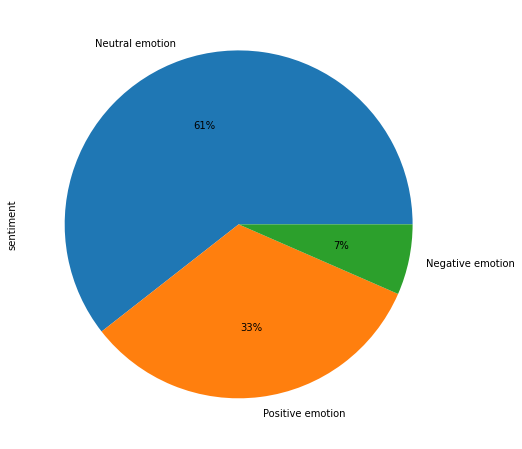

In [72]:
# Visualize the target variable
fig, ax = plt.subplots(figsize=(12,8))
data["sentiment"].value_counts().plot(kind="pie", autopct='%.0f%%');

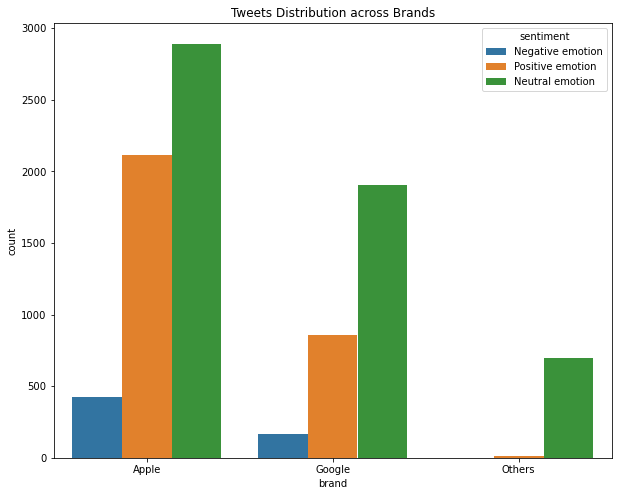

In [73]:
# Visualize the distibution across the brands
plt.figure(figsize=(10, 8))
sns.countplot(x='brand', data=data, hue='sentiment')
plt.title('Tweets Distribution across Brands')
plt.show()

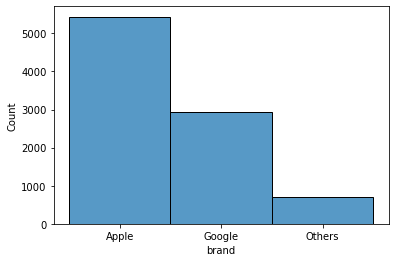

In [74]:
# Visualize distribution in the brands
sns.histplot(data['brand']);

In [75]:
#tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', ngram_range=(1,3),  stop_words= 'english')
#df_tweets_vect = tfidf.fit_transform(data['tweet'])
#df_tweets_vect.toarray()

In [76]:
#pd.DataFrame(df_tweets_vect.toarray(), columns=tfidf.get_feature_names())

# MODELING

In [77]:
y = data[["sentiment"]].apply(LabelEncoder().fit_transform)
y.head()

,sentiment
0,0
1,2
2,2
3,0
4,2


- 0 - Negative emotion
- 1 - Neutral emotion
- 2 - Positive emotion

### MultinomialNB

In [78]:
# Defining variables
X_lammetized = data['lemmatization']
y = data['sentiment']

In [79]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_lammetized, y, test_size=0.3, random_state=42)

In [80]:
# Creating a vectorizer
tfidf = TfidfVectorizer(analyzer=basic_clean)

# Fit and transform vectorizer
X_train_vectorized = tfidf.fit_transform(X_train)
X_test_vectorized = tfidf.transform(X_test)

In [94]:
# Scoring  
def score(model,test_y=y_test,test_x=X_test_vectorized,train_y=y_train,train_x=X_train_vectorized):
    """This function outputs the f1 score and accuracy for the models"""
    y_pred = model.predict(test_x)
    f1_train = f1_score(train_y,model.predict(train_x),average="weighted")
    f1_test = f1_score(test_y,y_pred,average="weighted")

    test_accuracy = accuracy_score(test_y,y_pred)
    train_accuracy = accuracy_score(train_y,model.predict(train_x))
    print(f"""
    {model}
    Train F1 score: {f1_train}
    Train accuracy: {train_accuracy}


    Test F1 score: {f1_test}
    Test accuracy: {test_accuracy}
    """)

In [82]:
# Evaluating Multinomial Naive Bayes
baseline_model = MultinomialNB()

nb_classifier = baseline_model.fit(X_train_vectorized, y_train)
nb_train_predictions = nb_classifier.predict(X_train_vectorized)
nb_test_predictions = nb_classifier.predict(X_test_vectorized)

In [83]:
# Score of the model
score(baseline_model)



    MultinomialNB()
    Train F1 score: 0.4444247815831792
    Train accuracy: 0.5950543392660261


    Test F1 score: 0.48608164602894716
    Test accuracy: 0.6291804483645719
    


In [84]:
# Tuned hyperparameters
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
lr_gridcv = GridSearchCV(LogisticRegression(max_iter = 1000), cv=5, param_grid=param_grid_)

lr_gridcv.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [85]:
lr_gridcv.best_params_

{'C': 10.0}

In [86]:
# Tuned logistic regession
tuned_lr = LogisticRegression(max_iter=1000,C=1)
logreg = tuned_lr.fit(X_train_vectorized, y_train)

# Score the model
score(logreg)


    LogisticRegression(C=1, max_iter=1000)
    Train F1 score: 0.5161055190024804
    Train accuracy: 0.6089147897306663


    Test F1 score: 0.5429232446253073
    Test accuracy: 0.6324880558618156
    


In [87]:
# fit the training dataset on the classifier
svm_clf = svm.SVC()
svm_clf.fit(X_train_vectorized, y_train)

# Score Model
score(svm_clf)


    SVC()
    Train F1 score: 0.4559002352259354
    Train accuracy: 0.6005670184280989


    Test F1 score: 0.4968076915639509
    Test accuracy: 0.6339581036383682
    


In [88]:
param = {
    "C":[1,2,3],
    "kernel": ['rbf', 'poly'],
    "gamma": ['scale', 'auto']
    
}
svm_gridcv = GridSearchCV(estimator=svm.SVC(),param_grid=param,scoring="accuracy")
svm_gridcv.fit(X_train_vectorized, y_train)
svm_gridcv.best_params_

{'C': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [89]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier

SVM = svm.SVC(C=3, kernel='poly', gamma='scale')
SVM.fit(X_train_vectorized, y_train)

# Score the model
score(SVM)


    SVC(C=3, kernel='poly')
    Train F1 score: 0.5682034487025225
    Train accuracy: 0.6448259568435974


    Test F1 score: 0.5468567960003845
    Test accuracy: 0.6324880558618156
    


# EVALUATION

The metrics used for evaluation are:
- Accuracy 
- f1_score

In [92]:
score(tuned_lr)


    LogisticRegression(C=1, max_iter=1000)
    Train F1 score: 0.5161055190024804
    Train accuracy: 0.6089147897306663


    Test F1 score: 0.5429232446253073
    Test accuracy: 0.6324880558618156
    
                  precision    recall  f1-score   support

Negative emotion       0.00      0.00      0.00       188
 Neutral emotion       0.65      0.95      0.77      1712
Positive emotion       0.47      0.13      0.20       821

        accuracy                           0.63      2721
       macro avg       0.37      0.36      0.32      2721
    weighted avg       0.55      0.63      0.54      2721

--------------------------------------------------


d:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'plot_confusion_matrix' is not defined

# DEPLOYMENT